In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Files Containing Historical Weekly Data

- **Source:** Yahoo Finance ([TCS](https://finance.yahoo.com/quote/TCS.NS/history?p=TCS.NS))([Nifty50](https://finance.yahoo.com/quote/%5ENSEI/history?p=%5ENSEI))
- **Time Period:** 30Sept2020 to 30Sept2023
- **Frequency:** Weekly

In [2]:
n50 = pd.read_csv('C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/Yahoo Finance/TCS beta Nifty50/NSE 30 sept 2020 to 30sep 2023 weekly historical prices yahoo finance.csv')
tcs = pd.read_csv('C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/Yahoo Finance/TCS beta Nifty50/TCS 30 sept 2020 to 30sep 2023 weekly historical prices yahoo finance.csv')

In [3]:
display(
n50.head(2),
tcs.head(2)
)

,Date,Open,High,Low,Close,Adj Close,Volume
0,28-09-2020,11244.45020,11428.59961,11184.54981,11416.9502,11416.9502,947000
1,05-10-2020,11487.79981,11938.59961,11452.29981,11914.2002,11914.2002,2825300


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,2489.0,2540.0,2460.000000,2523.449951,2379.151611,6527503
1,2020-10-05,2620.0,2885.0,2603.050049,2812.949951,2652.096924,64493147


## Risk Free Rate

- **Source:** [RBI Database on Indian Economy](https://cimsdbie.rbi.org.in/#/dbie/home)
- CSV File is also attached in GitHub repository.

<p>
    
- savings rate is used; as call money rate is not accessible to general public and 1 year term deposit rate would have a different time frame
- savings rate ranged from 2.7-3.0 throughout 2020-2023, therefore, I have taken 2.9% as estimation

In [4]:
risk_free_rate = 0.029/52

## Weekly Return of TCS and Nifty50

- Adjusted Close Price is used for calculating weekly return.

In [5]:
n50['Weekly_Return'] = n50['Adj Close'].pct_change()
n50.dropna(inplace = True)
n50_weekly_return = n50['Weekly_Return']
n50_avg_weekly_return = n50_weekly_return.mean()

print(f'Nifty50 Average Weekly Return: {n50_avg_weekly_return}')
display(n50.head())

Nifty50 Average Weekly Return: 0.0036790556675371875


,Date,Open,High,Low,Close,Adj Close,Volume,Weekly_Return
1,05-10-2020,11487.79981,11938.59961,11452.29981,11914.20020,11914.20020,2825300,0.043554
2,12-10-2020,11973.54981,12025.45020,11661.29981,11762.45020,11762.45020,2714800,-0.012737
3,19-10-2020,11879.20020,12018.65039,11775.75000,11930.34961,11930.34961,2665900,0.014274
4,26-10-2020,11937.40039,11942.84961,11535.45020,11642.40039,11642.40039,2948800,-0.024136
5,02-11-2020,11697.34961,12280.40039,11557.40039,12263.54981,12263.54981,3119300,0.053352


In [6]:
tcs['Weekly_Return'] = tcs['Adj Close'].pct_change()
tcs.dropna(inplace = True)
tcs_weekly_return = tcs['Weekly_Return']
tcs_avg_weekly_return = tcs_weekly_return.mean()

print(f'TCS Average Weekly Return: {tcs_avg_weekly_return}')
display(tcs.head())

TCS Average Weekly Return: 0.002996843011940713


,Date,Open,High,Low,Close,Adj Close,Volume,Weekly_Return
1,2020-10-05,2620.000000,2885.000000,2603.050049,2812.949951,2652.096924,64493147,0.114724
2,2020-10-12,2815.500000,2854.899902,2727.000000,2763.300049,2605.286865,25132145,-0.017650
3,2020-10-19,2774.000000,2774.000000,2638.100098,2686.800049,2543.961182,20068995,-0.023539
4,2020-10-26,2689.949951,2718.149902,2600.250000,2664.850098,2523.178467,16312670,-0.008169
5,2020-11-02,2660.000000,2721.850098,2600.050049,2707.449951,2563.513428,17045316,0.015986


## Beta (Weekly)

$ \beta = \frac{Covariance(Returns_{stock}, Returns_{market})}{Variance(Returns_{market})} $

In [7]:
w_covariance = tcs_weekly_return.cov(n50_weekly_return)
w_variance = n50_weekly_return.var()

beta_weekly = w_covariance/w_variance
print(f'Beta Weekly: {beta_weekly}')

Beta Weekly: 0.8350315360320257


## CAPM (Weekly)


$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $

Where:
- $ E(R_i) $ is the expected return on the asset in question.
- $ R_f $ is the risk-free rate.
- $ \beta_i $ is the beta coefficient for the asset, which measures its sensitivity to the overall market.
- $ E(R_m) $ is the expected return on the market portfolio.


In [8]:
CAPM_weekly = risk_free_rate + beta_weekly * (n50_avg_weekly_return - risk_free_rate)
print(f'CAPM Weekly: {CAPM_weekly}')

CAPM Weekly: 0.0031641291485776622


## Result (Weekly)

In [9]:
print(
f'Nifty50 Annual Return Based on Weekly Investments: {n50_avg_weekly_return*52}', '\n',
f'TCS Annual Return Based on Weekly Investments: {tcs_avg_weekly_return*52}', '\n',
f'Beta Weekly: {beta_weekly}', '\n',
f'CAPM Annual Expected Return based on Weekly Investments: {CAPM_weekly*52}'
)

Nifty50 Annual Return Based on Weekly Investments: 0.19131089471193374 
 TCS Annual Return Based on Weekly Investments: 0.15583583662091707 
 Beta Weekly: 0.8350315360320257 
 CAPM Annual Expected Return based on Weekly Investments: 0.16453471572603845


## Files Containing Historical Monthly Data

- **Source:** Yahoo Finance ([TCS](https://finance.yahoo.com/quote/TCS.NS/history?p=TCS.NS))([Nifty50](https://finance.yahoo.com/quote/%5ENSEI/history?p=%5ENSEI))
- **Time Period:** 30Sept2020 to 30Sept2023
- **Frequency:** Monthly

- The weeky data could have been downsampled to Monthly frequency but I didn't do that as misalignment of some dates might lead erroneous results
- Instead, I downloaded the data with monthly frequency from the same source.
- And in fact, the downsampled data really gave slightly different result from this original monthly data even though they are from the same source.

In [10]:
n50_monthly = pd.read_csv('C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/Yahoo Finance/TCS beta Nifty50/Monthly data Nifty50.csv')
tcs_monthly = pd.read_csv('C:/Users/himan/Documents/Books/Coding Project/Version 1/Databases/Datasets List1/Yahoo Finance/TCS beta Nifty50\Monthly data TCS.csv')

In [11]:
display(

    n50_monthly.head(),
    tcs_monthly.head()
    
)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,11364.450195,12025.450195,11347.049805,11642.400391,11642.400391,11602500
1,2020-11-01,11697.349609,13145.849609,11557.400391,12968.950195,12968.950195,13004600
2,2020-12-01,13062.200195,14024.849609,12962.799805,13981.750000,13981.750000,12077600
3,2021-01-01,13996.099609,14753.549805,13596.750000,13634.599609,13634.599609,13119900
4,2021-02-01,13758.599609,15431.750000,13661.750000,14529.150391,14529.150391,14313900


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,2510.0,2885.000000,2492.300049,2664.850098,2512.466553,128617294
1,2020-11-01,2660.0,2744.000000,2600.050049,2679.649902,2537.191162,65135883
2,2020-12-01,2679.0,2952.000000,2624.449951,2862.750000,2710.557373,62832148
3,2021-01-01,2880.0,3339.800049,2879.000000,3111.350098,2945.940674,84685394
4,2021-02-01,3100.0,3245.800049,2880.000000,2894.300049,2745.645020,65464843


# Monthly Return of TCS and Nifty50

In [12]:

n50_monthly['Monthly_Return'] = n50_monthly['Adj Close'].pct_change()
n50_monthly.dropna(inplace = True)
n50_monthly_return = n50_monthly['Monthly_Return']

n50_avg_monthly_return = n50_monthly_return.mean()
print(f'Nifty50 Monthly Return Average: {n50_avg_monthly_return}')
n50_monthly.head()

Nifty50 Monthly Return Average: 0.015428547479970954


,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_Return
1,2020-11-01,11697.349609,13145.849609,11557.400391,12968.950195,12968.950195,13004600,0.113941
2,2020-12-01,13062.200195,14024.849609,12962.799805,13981.750000,13981.750000,12077600,0.078094
3,2021-01-01,13996.099609,14753.549805,13596.750000,13634.599609,13634.599609,13119900,-0.024829
4,2021-02-01,13758.599609,15431.750000,13661.750000,14529.150391,14529.150391,14313900,0.065609
5,2021-03-01,14702.500000,15336.299805,14264.400391,14690.700195,14690.700195,9886800,0.011119


In [13]:

tcs_monthly['Monthly_Return'] = tcs_monthly['Adj Close'].pct_change()
tcs_monthly.dropna(inplace = True)

tcs_monthly_return = tcs_monthly['Monthly_Return']

tcs_avg_monthly_return = tcs_monthly_return.mean()
print(f'TCS Monthly Return Average: {tcs_avg_monthly_return}')
tcs_monthly.head()

TCS Monthly Return Average: 0.011090026607052892


,Date,Open,High,Low,Close,Adj Close,Volume,Monthly_Return
1,2020-11-01,2660.0,2744.000000,2600.050049,2679.649902,2537.191162,65135883,0.009841
2,2020-12-01,2679.0,2952.000000,2624.449951,2862.750000,2710.557373,62832148,0.068330
3,2021-01-01,2880.0,3339.800049,2879.000000,3111.350098,2945.940674,84685394,0.086839
4,2021-02-01,3100.0,3245.800049,2880.000000,2894.300049,2745.645020,65464843,-0.067990
5,2021-03-01,2926.0,3205.000000,2901.800049,3177.850098,3014.631592,71839377,0.097968


## Beta (Monthly)

In [14]:
beta_monthly = tcs_monthly_return.cov(n50_monthly_return) / n50_monthly_return.var()
beta_monthly

0.5808944085350548

## CAPM (Monthly)

In [15]:
CAPM_monthly = risk_free_rate + beta_monthly * (n50_avg_monthly_return - risk_free_rate)
CAPM_monthly*12

0.11035306712884287

## Result (Monthly)

In [16]:
print(f'TCS Annual Return on Monthly Investments: {tcs_avg_monthly_return*12}')
print(f'Nifty50 Annual Returns on Monthly Investments: {n50_avg_monthly_return*12}')
print(f'Beta Monthly: {beta_monthly}')
print(f'CAPM Expected Annual Return For TCS Monthly Investments: {CAPM_monthly*12}')

TCS Annual Return on Monthly Investments: 0.1330803192846347
Nifty50 Annual Returns on Monthly Investments: 0.18514256975965146
Beta Monthly: 0.5808944085350548
CAPM Expected Annual Return For TCS Monthly Investments: 0.11035306712884287


## Distribution of Returns

Text(0, 0.5, '')

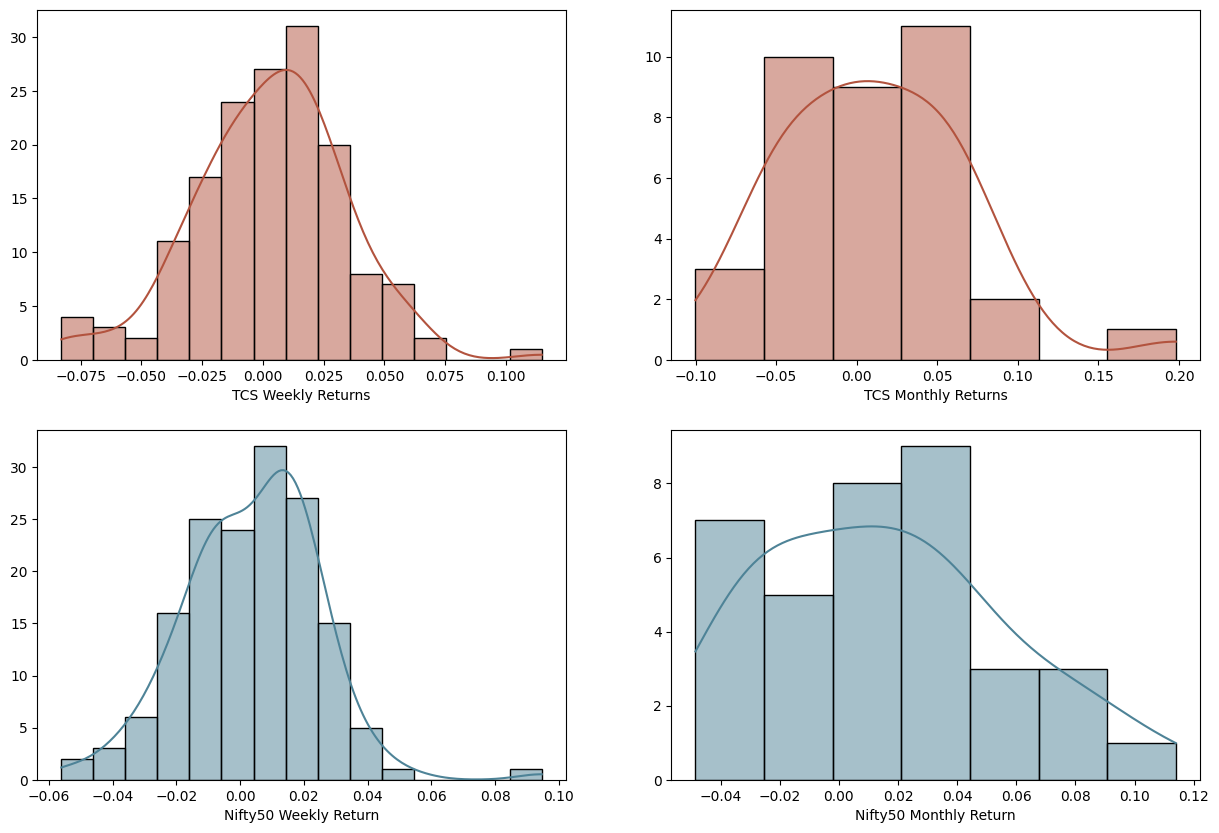

In [17]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.histplot(data = tcs,
            x = 'Weekly_Return', kde = True, color = '#B2533E')
plt.xlabel('TCS Weekly Returns')
plt.ylabel('')

plt.subplot(2,2,2)
sns.histplot(data = tcs_monthly,
            x = 'Monthly_Return', kde = True, color = '#B2533E')
plt.xlabel('TCS Monthly Returns')
plt.ylabel('')

plt.subplot(2,2,3)
sns.histplot(data = n50,
            x = 'Weekly_Return', kde = True, color = '#4E8397')
plt.xlabel('Nifty50 Weekly Return')
plt.ylabel('')

plt.subplot(2,2,4)
sns.histplot(data = n50_monthly,
            x = 'Monthly_Return', kde = True, color = '#4E8397')
plt.xlabel('Nifty50 Monthly Return')
plt.ylabel('')

# Comparative Analysis: Weekly vs. Monthly Investment Returns for Nifty50 and TCS



1. **Annual Returns on Weekly Investments vs. Monthly Investments**:
   - **Nifty50**:
     - Weekly Investments: 19.13%
     - Monthly Investments: 15.14%
     - **Analysis**: Nifty50 provided higher returns on weekly investments when compared to monthly investments. There's a difference of almost 4% annually, suggesting that the frequent investment strategy (weekly) might have capitalized more on market opportunities.
     
   - **TCS**:
     - Weekly Investments: 15.58%
     - Monthly Investments: 13.31%
     - **Analysis**: Similar to Nifty50, TCS too recorded higher annual returns when invested weekly as opposed to monthly. The difference here is roughly 2.27%. This indicates that weekly investments might have offered better average purchase prices over the year, thereby leading to superior returns.

2. **Beta (Systematic Risk)**:
   - **Weekly**: 
     - TCS: 0.835 
     - **Analysis**: A beta value less than 1 suggests that TCS has lower volatility in comparison to the Nifty50 on a weekly basis. Hence, TCS is relatively less risky on a weekly timeframe.

   - **Monthly**:
     - TCS: 0.5809
     - **Analysis**: On a monthly scale, the beta value for TCS further decreases, emphasizing that TCS is even less volatile and hence less risky compared to Nifty50 on a monthly basis.

3. **CAPM (Capital Asset Pricing Model) Expected Returns**:
   - **Weekly**:
     - TCS: 16.45%
     - **Analysis**: Based on the CAPM model, the expected return for TCS on a weekly investment basis is 16.45%. This is slightly higher than its actual return of 15.58%, suggesting that TCS might have slightly underperformed against the expected return for the risk undertaken.
     
   - **Monthly**:
     - TCS: 11.04%
     - **Analysis**: On a monthly scale, the CAPM expected return is 11.04%, which is lower than the weekly expected return. It is also lower than the actual return of 13.35% for monthly investments. This suggests that TCS has outperformed the expected return for the risk undertaken on a monthly scale.

**Overall Insights**:

- Both Nifty50 and TCS have shown higher returns on weekly investments compared to monthly investments.
  
- TCS has consistently shown lower volatility (beta) compared to Nifty50, whether on a weekly or monthly basis. This makes TCS a relatively safer investment in terms of market-induced volatility.
  
- Based on the CAPM model, TCS has slightly underperformed on a weekly investment scale but outperformed on a monthly scale when compared to the expected returns for the respective risks.